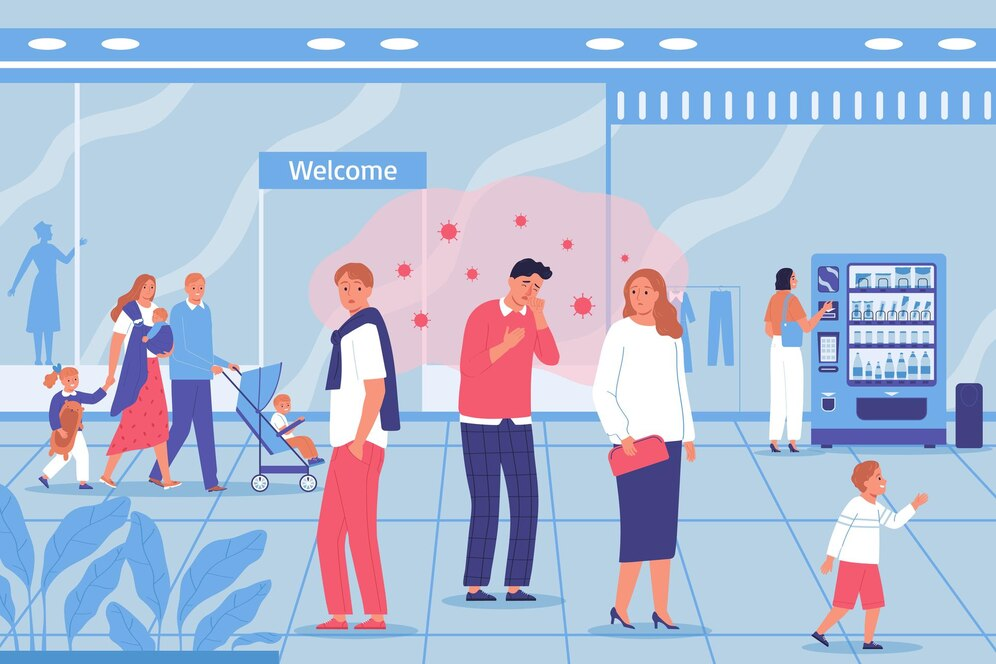

# **Problem Statement**

---




#### **The objective of this case study is to analyze the relationship between symptoms and diseases in order to accurately diagnose a person's condition. With various symptoms such as headache, joint pain, and cough, it is crucial to determine the underlying disease, as it can range from mild to severe. This study highlights the significance of identifying specific symptoms and their corresponding diseases to improve diagnostic accuracy and facilitate appropriate medical treatment**

## **Importing Libraries**

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

In [ ]:
df = pd.read_csv('/content/dataset.csv')

In [ ]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see a lot of null values here in the last columns so lets us check what is the percenage of null values in each column. Usually having columns with lot of null values more than 60% is pointless. Hence dropping unnecessary columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [ ]:
df.isnull().mean()*100

,0
Disease,0.000000
Symptom_1,0.000000
Symptom_2,0.000000
Symptom_3,0.000000
Symptom_4,7.073171
Symptom_5,24.512195
Symptom_6,40.365854
Symptom_7,53.902439
Symptom_8,60.487805
Symptom_9,65.609756


In [ ]:
df.isnull().sum()

,0
Disease,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,348
Symptom_5,1206
Symptom_6,1986
Symptom_7,2652
Symptom_8,2976
Symptom_9,3228


## Insights:

here we can see that the percentage of null values is high from Symptom_5 column. Here we shall drop those columns whose null value percentage is greater that 50%.

As we see here,
- Symptom_7     53.902439
- Symptom_8     60.487805
- Symptom_9     65.609756
- Symptom_10    69.268293
- Symptom_11    75.731707
- Symptom_12    84.878049
- Symptom_13    89.756098
- Symptom_14    93.780488
- Symptom_15    95.121951
- Symptom_16    96.097561
- Symptom_17    98.536585

and we need to make a new dataframe and handle null values for the rest of the columns.

Here we are dropping columns from Symptom_7 to Symptom_17 as the null values in it is almost very close to 50%.

In [ ]:
df_new = df.iloc[:,:7]
df_new

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails


In [ ]:
for col in df_new.columns:
  df_new[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-167-917a06a82efa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-167-917a06a82efa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
df_new.isnull().sum()

,0
Disease,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,0
Symptom_5,0
Symptom_6,0


In [ ]:
df_new.duplicated().sum()

np.int64(4658)

In [ ]:
df_new.shape

(4920, 7)

In [ ]:
(4658/4920)*100

94.67479674796748

we can not drop the duplicated values because if we drop them we will be losing 94% of our entire data.

## **Label Encoding**

In [ ]:
le = LabelEncoder()

for col in df_new.columns:
  df_new[col] = le.fit_transform(df_new[col])

<ipython-input-172-95fbcf57a3f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[col] = le.fit_transform(df_new[col])
<ipython-input-172-95fbcf57a3f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[col] = le.fit_transform(df_new[col])
<ipython-input-172-95fbcf57a3f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [ ]:
df_new

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,15,33,35,35,11,12,20
1,15,24,27,18,19,12,20
2,15,33,27,18,19,12,20
3,15,33,35,18,19,12,20
4,15,33,35,35,19,12,20
...,...,...,...,...,...,...,...
4915,0,28,17,33,38,22,29
4916,2,24,31,3,35,12,20
4917,38,4,4,22,7,12,20
4918,35,24,20,42,36,27,15


## **Model Building**

In [ ]:
X = df_new.drop('Disease', axis=1)
y = df_new['Disease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=34)

#### **KNN Classifier**

In [ ]:
# Initialize and fit the KNN classifier model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the model
test_accuracy = knn.score(X_test, y_test)*100
print('Accuracy of Testing data =', test_accuracy)

Accuracy of Testing data = 98.17073170731707


In [ ]:
train_accuracy = knn.score(X_train, y_train)*100
print('Accuracy of training data =', train_accuracy)

Accuracy of training data = 99.54268292682927


## **Confusion Matrix**

In [180]:
y_pred = knn.predict(X_test)

In [181]:
confusion_matrix(y_test, y_pred)

array([[16,  0,  0, ...,  0,  0,  0],
       [ 0, 17,  0, ...,  0,  0,  0],
       [ 0,  0, 22, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 16,  0,  0],
       [ 0,  0,  0, ...,  0, 28,  0],
       [ 0,  0,  0, ...,  0,  0, 30]])

- The confusion matrix below shows how well the KNN classifier performed across all disease categories.
- It highlights the number of correct predictions (diagonal) and any misclassifications (off-diagonal).


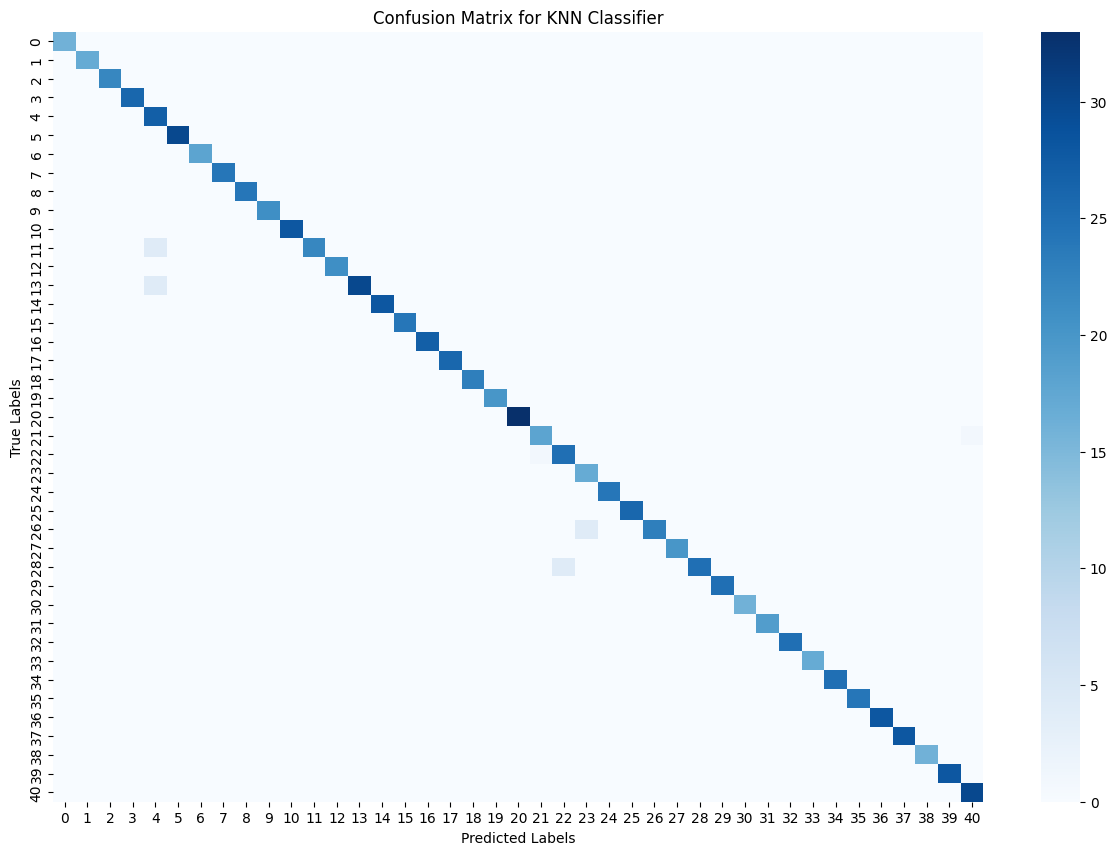

In [185]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display using Seaborn heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
